In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 32})

In [3]:
corpus_labels = ['reviews', 'news']
corpus_weights = [0.1, 0.9]
corpus_colors = ['steelblue','firebrick']
linewidth = 10
gaussian_model = False

In [4]:
if gaussian_model:
    # gaussian model
    corpus_stats = [(5,0.5), (14,1.5)]
    x = np.arange(0,22, 0.1)
    bbox = (1.2, 1)
else:
    # non-gaussian model
    corpus_stats = [(2,0.5), (5,1.5)]
    x = np.arange(0,12, 0.1)
    bbox = None

In [5]:
corpus_dists = [norm(mu,sigma).pdf(x) for (mu,sigma) in corpus_stats]
train_dists = np.zeros(corpus_dists[0].shape)
for weight, dists in zip(corpus_weights, corpus_dists):
    train_dists+=weight*dists

In [6]:
if gaussian_model:
    mle_dists = norm(np.sum([mu*w for (mu, sigma), w in zip(corpus_stats, corpus_weights)]), 3).pdf(x)
    dro_dists = norm(np.mean([mu for (mu,sigma) in corpus_stats]), 5).pdf(x)
else:
    mle_dists = train_dists
    dro_dists = 0.3*corpus_dists[0] + 0.7*corpus_dists[1]

In [7]:
def plot_corpus(ax, corpus_labels, corpus_dists, corpus_weights, corpus_colors, training_dists, plot_train=False):
    if plot_train:
        linestyle=':'
    else:
        linestyle='-'
    for label, dist, weight, color in zip(corpus_labels, corpus_dists, corpus_weights, corpus_colors):
        ax.plot(x, 0.95*weight*dist, label=label, linewidth=linewidth, color=color, linestyle=linestyle)
    if plot_train:
        ax.plot(x, train_dists, label='training', color='black', linewidth=linewidth)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$p_{x}^{train}(x)$')
    ax.set_xlim((0,max(x)))
    ax.set_ylim((0,max(train_dists)*1.1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(linewidth=linewidth/3*2, color='black')
    ax.axvline(linewidth=linewidth/3*4, color='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    leg = ax.legend(loc='upper right', bbox_to_anchor=bbox,
                fancybox=False, shadow=False, ncol=1)

In [8]:
def plot_models(ax, mle_dists, dro_dists):
    ax.plot(x, mle_dists, label='MLE', color='grey', linewidth=linewidth)
    ax.plot(x, dro_dists, label='robust', color='mediumpurple', linewidth=linewidth)
    # plt.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$p_\theta(x)$')
    ax.set_xlim((0,max(x)))
    ax.set_ylim((0,np.max([mle_dists, dro_dists])*1.1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    leg = ax.legend(loc='upper right', bbox_to_anchor=bbox,
                    fancybox=False, shadow=False, ncol=1)
    ax.axhline(linewidth=linewidth/3*2, color='black')
    ax.axvline(linewidth=linewidth/3*4, color='black')

In [9]:
def plot_arrow(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.arrow(0.5, 0.9, 0, -0.6, width=linewidth*0.001, head_width=0.06, head_length=0.2, fc='k', ec='k', 
             in_layout=True)
    ax.text(0.5, 0.6, r'$p_\theta$', horizontalalignment='center',
            verticalalignment='center', 
            bbox=dict(boxstyle='square', ec=(0,0,0), fc=(1,1,1)))

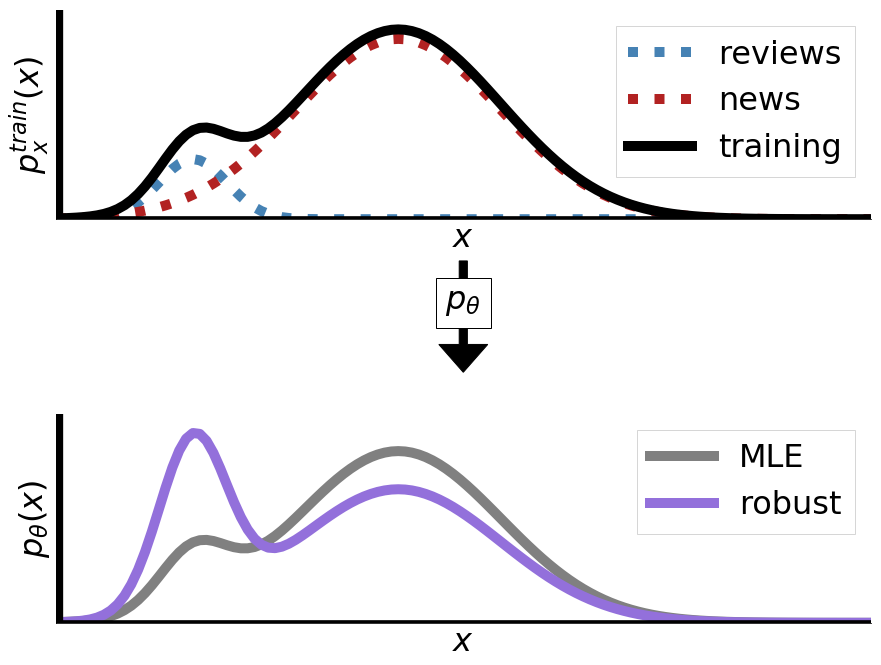

In [10]:
fig, ax = plt.subplots(3,1, figsize=(13,10), gridspec_kw={'height_ratios': [3, 2, 3]})
plot_corpus(ax[0], corpus_labels, corpus_dists, corpus_weights, corpus_colors, train_dists, plot_train=True)
plot_arrow(ax[1])
plot_models(ax[2], mle_dists, dro_dists)
# plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig('../mle_vs_dro.pdf')